In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [116]:
df = pd.read_csv("./PJME_hourly.csv")
df.set_index("Datetime", inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<Axes: title={'center': 'PJME Energy use in Megawatts'}, xlabel='Datetime'>

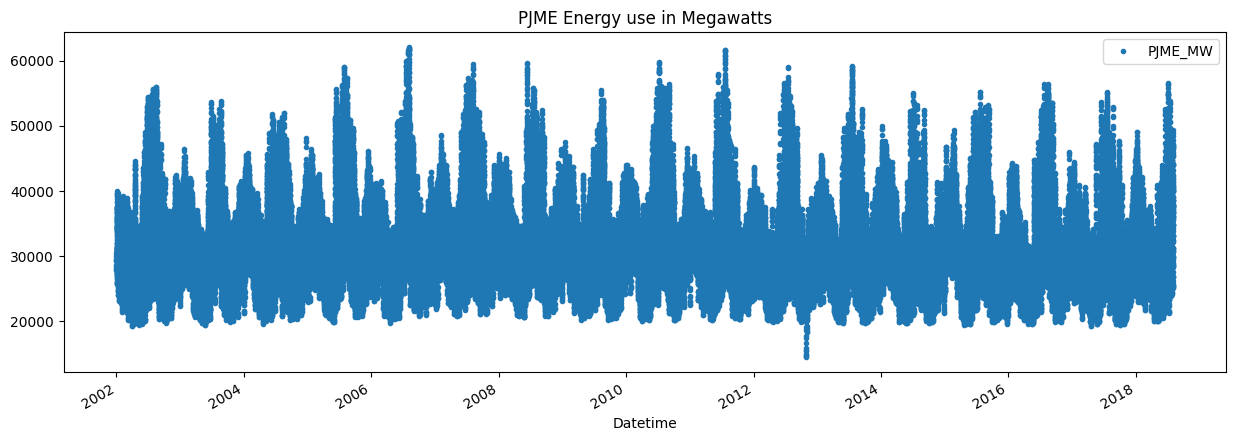

In [117]:

df.plot(style=".", figsize=(15,5), title="PJME Energy use in Megawatts")

In [118]:
df = df.resample("h").mean()


### Starting with the model

#### Train/Test Split

In [119]:
# X_train = df[df.index<"01-01-2015"]
train = df.loc[df.index<"01-01-2015"] #This is the recommended way
test = df.loc[df.index>="01-01-2015"]

In [120]:
train

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2014-12-31 19:00:00,38906.0
2014-12-31 20:00:00,37772.0
2014-12-31 21:00:00,36602.0


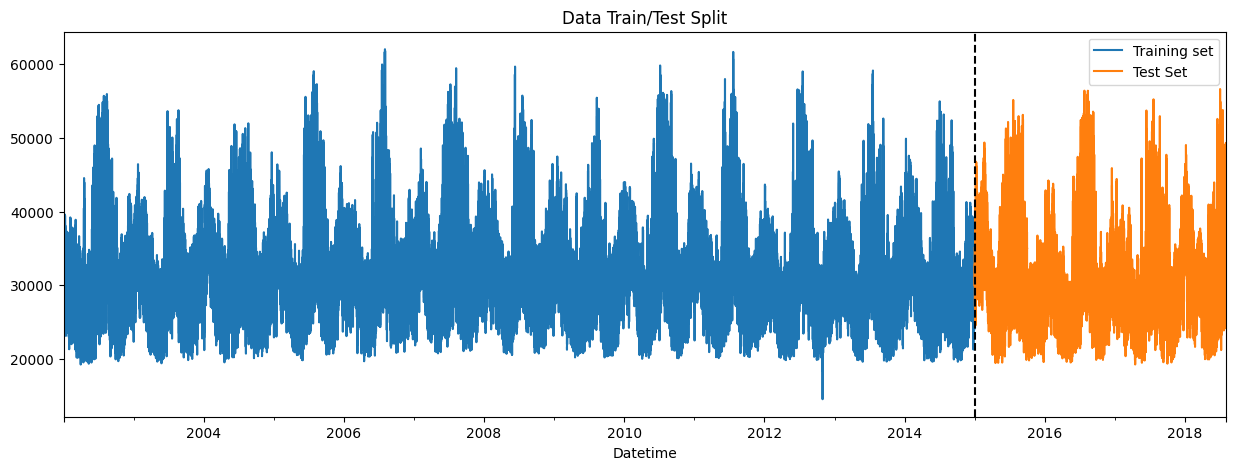

In [121]:
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax, label="Test set")
ax.axvline("01-01-2015", color="black", ls="--")
ax.legend(["Training set", "Test Set"])
plt.show()

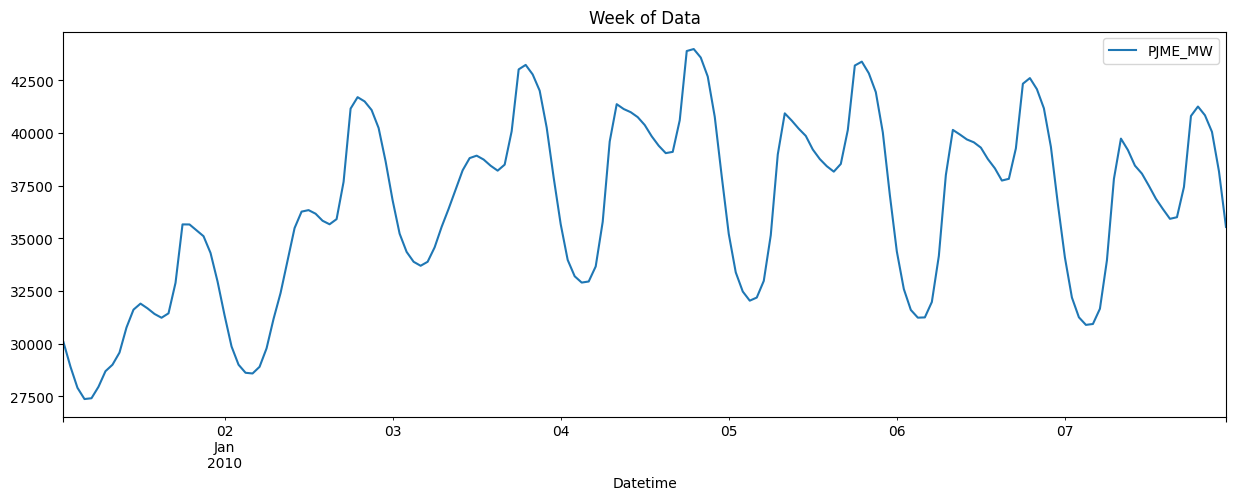

In [122]:
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot(figsize=(15,5), title="Week of Data")
plt.show()

#### Feature Engineering

In [128]:
def create_features(df):
    "Create time series features based on time series index"
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear

<Axes: >

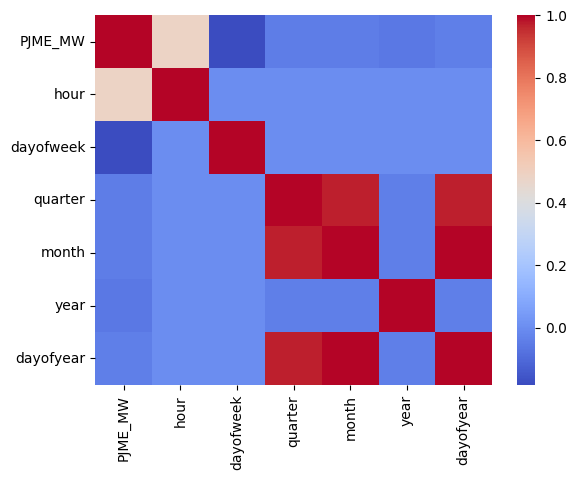

In [127]:
sns.heatmap(df.corr(), cmap="coolwarm")

#### Visualize our Feature/Target Relationship

Text(0.5, 1.0, 'Megawatt by Hour')

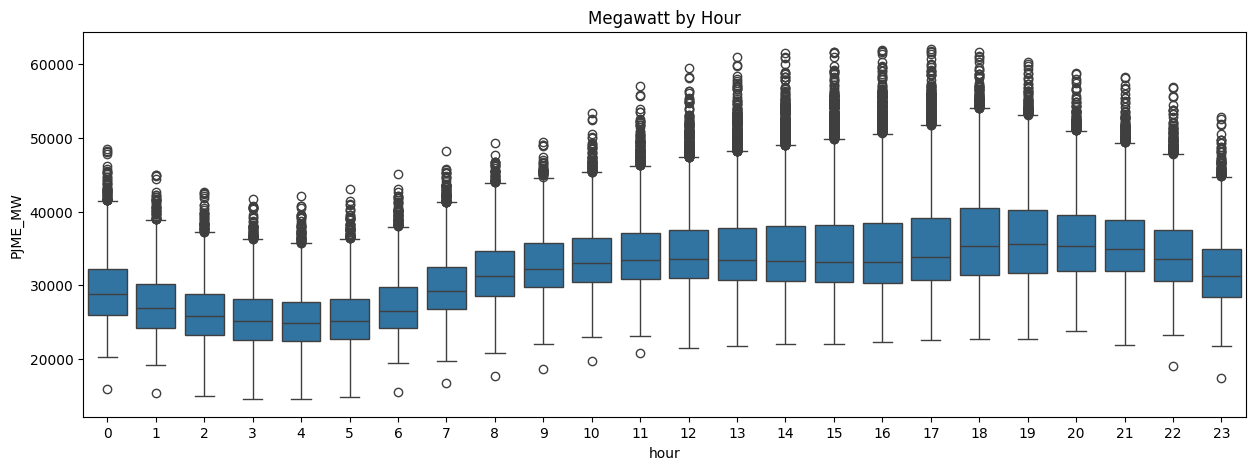

In [132]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x="hour", y="PJME_MW")
ax.set_title("Megawatt by Hour")

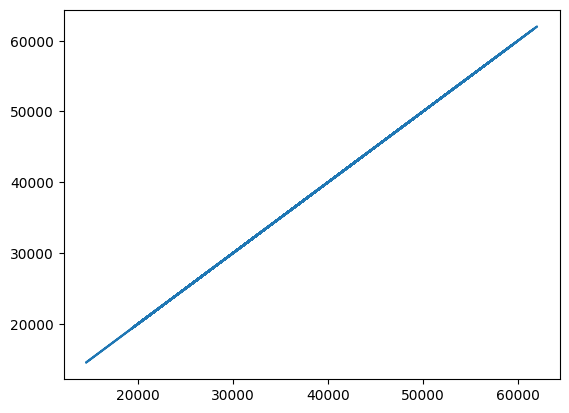

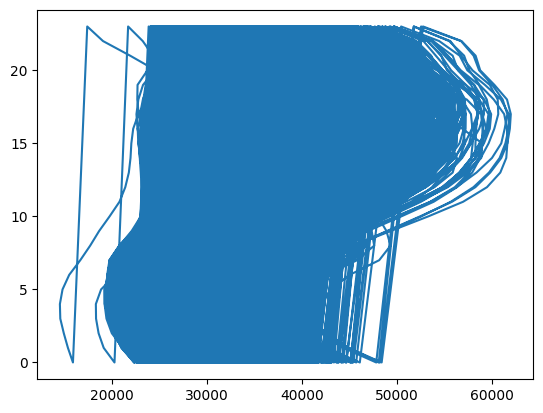

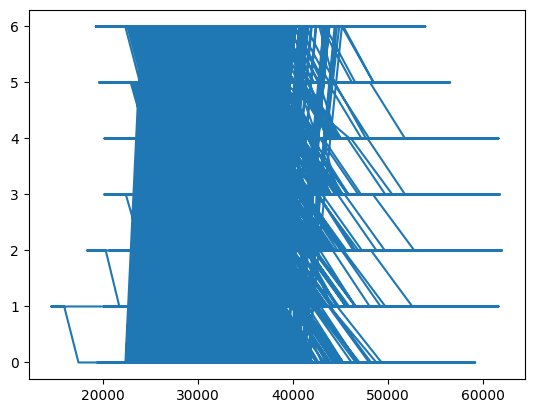

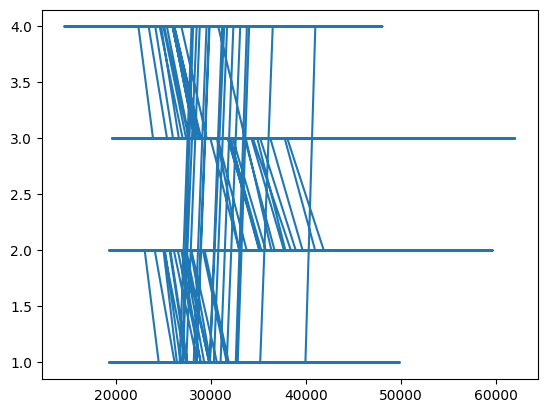

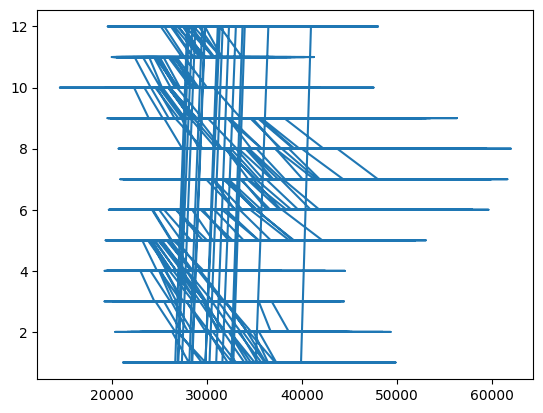

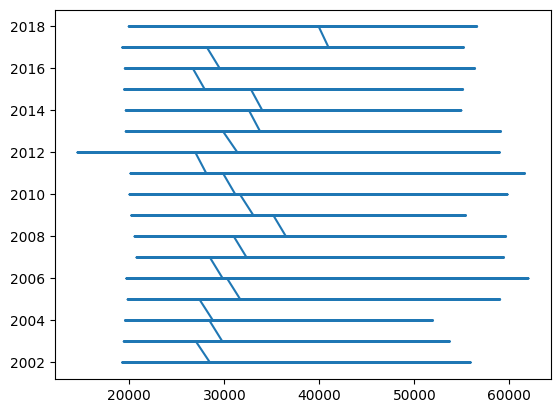

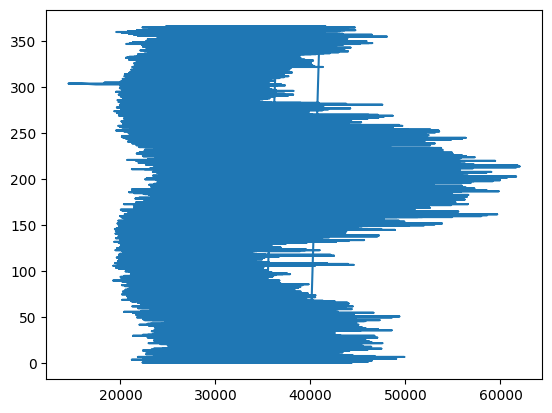

In [138]:
for i in df.columns:
    plt.plot(df["PJME_MW"], df[i])
    plt.show()